# Pixel Transforms - Image Processing Task

#### 🎯 Objective:
1. Create and display histograms for each RGB channel.
2. Apply intensity transformations to enhance contrast and brightness.
3. Perform histogram equalization on each channel.
4. Convert the image to grayscale and analyze its histogram.
5. Use Otsu's thresholding for segmentation.
6. Display original and transformed images side-by-side with histograms.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to show two images side by side
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap="gray" if len(image_1.shape)==2 else None)
    plt.title(title_1)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray" if len(image_2.shape)==2 else None)
    plt.title(title_2)
    plt.axis("off")
    plt.show()

#### 🖼️ Load the RGB Image baboon.png

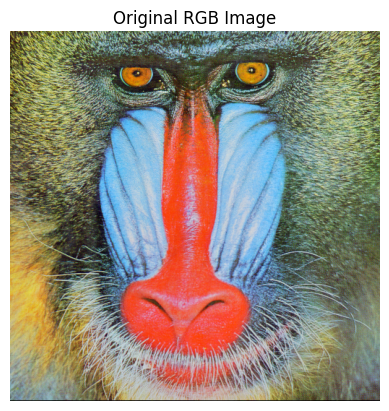

In [3]:
# Load and convert image for correct color display
image = cv2.imread("baboon.png") # BGR by default
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

#### 📊 Display Histograms for Each RGB Channel

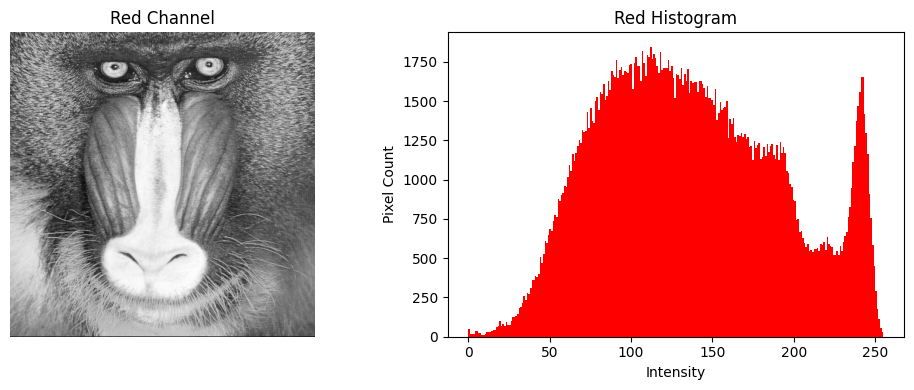

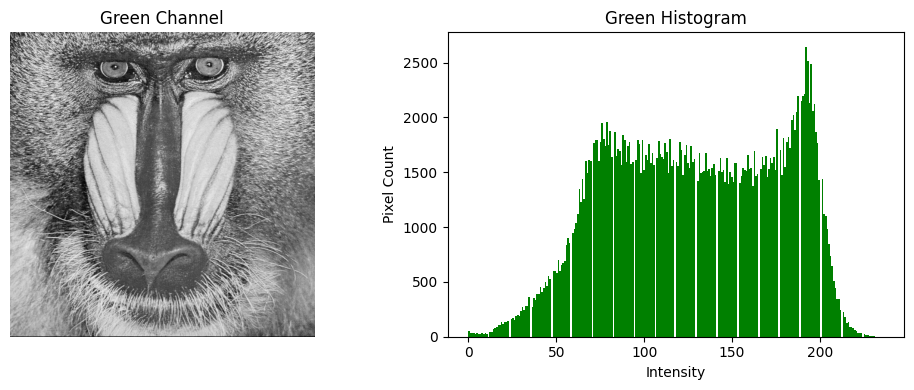

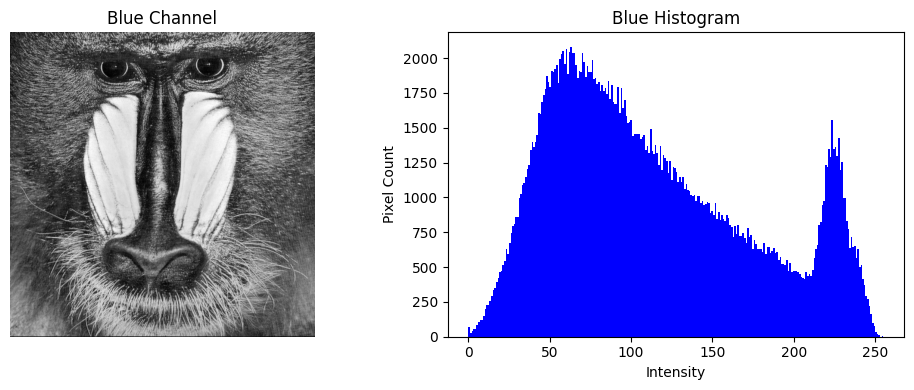

In [4]:
channels = ['Red', 'Green', 'Blue']
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb[:,:,i], cmap='gray')
    plt.title(f'{color} Channel')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.hist(image_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'{color} Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.tight_layout()
    plt.show()

#### ✨ Apply Brightness and Contrast Transformation

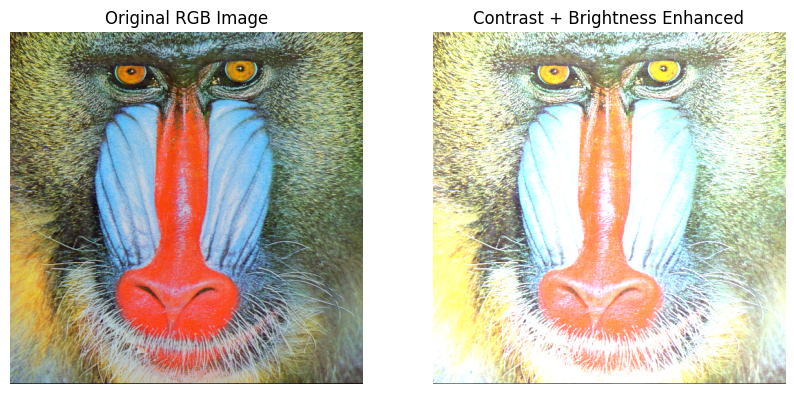

In [5]:
alpha = 1.5  # Contrast control
beta = 50    # Brightness control

# Apply transformation
image_transformed = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

# Show results
plot_image(image_rgb, image_transformed, "Original RGB Image", "Contrast + Brightness Enhanced")

#### 📈 Histogram Equalization per Channel

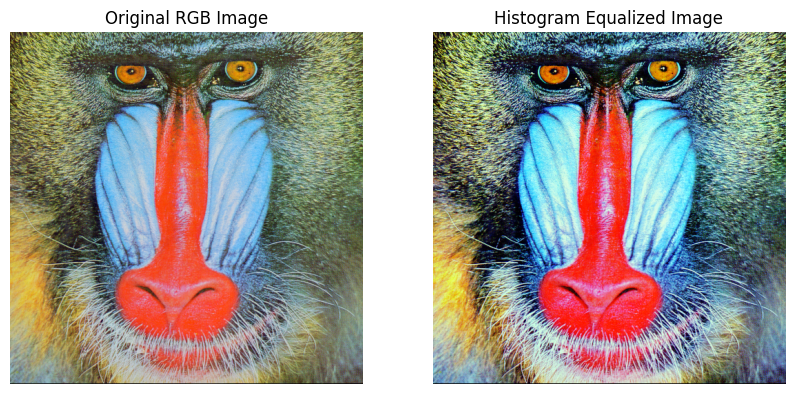

In [6]:
# Equalize each channel separately
equalized_channels = []
for i in range(3):
    equalized = cv2.equalizeHist(image_rgb[:,:,i])
    equalized_channels.append(equalized)

# Merge channels back
image_equalized = cv2.merge(equalized_channels)

# Display comparison
plot_image(image_rgb, image_equalized, "Original RGB Image", "Histogram Equalized Image")

#### 🧮 Compare Histograms Before and After Equalization

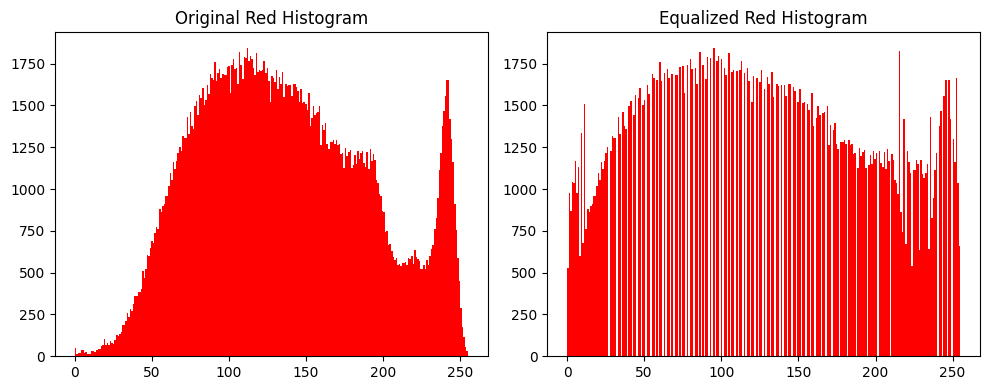

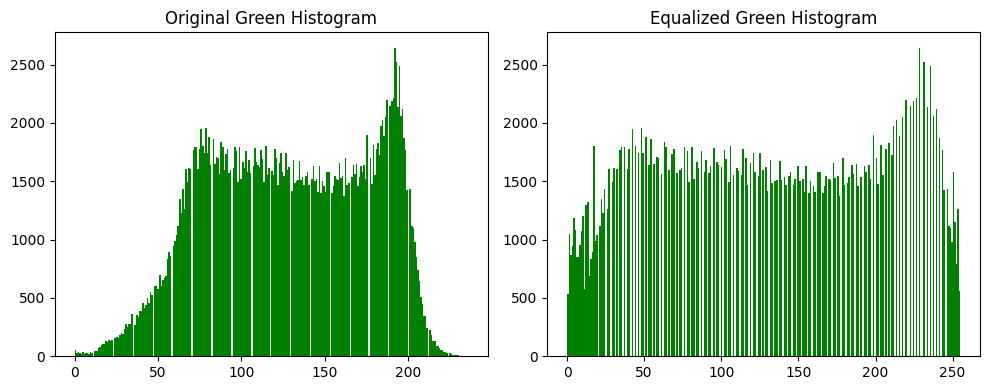

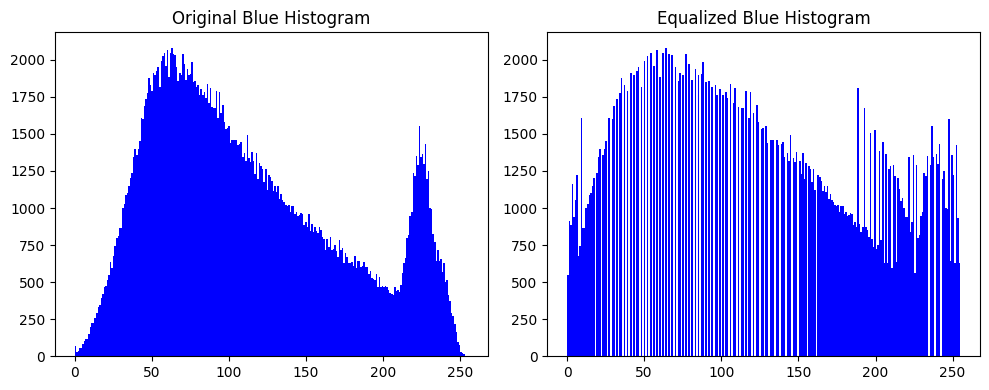

In [7]:
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(image_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'Original {color} Histogram')
    plt.subplot(1,2,2)
    plt.hist(equalized_channels[i].ravel(), bins=256, color=color.lower())
    plt.title(f'Equalized {color} Histogram')
    plt.tight_layout()
    plt.show()

#### 🧾 Convert to Grayscale and Show Histogram

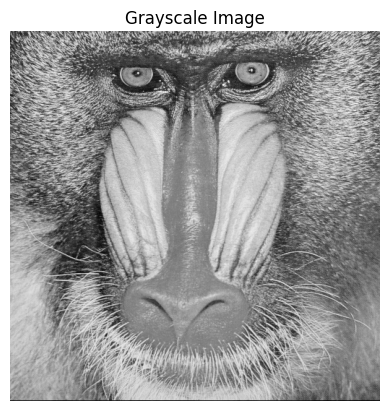

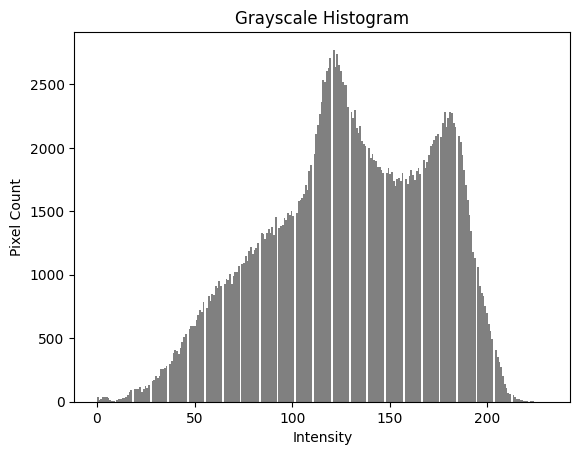

In [8]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Show histogram
plt.hist(gray_image.ravel(), bins=256, color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

#### 🔳 Thresholding

In [15]:
def thresholding(gray_image, threshold, max_value, min_value):
    N, M = gray_image.shape
    image_out = np.zeros((N, M), dtype=np.uint8)
    for i in range(N):
        for j in range(M):
            if gray_image[i, j] > threshold:
                image_out[i, j] = max_value
            else:
                image_out[i, j] = min_value
    return image_out

In [17]:
threshold = 1
max_value = 255
min_value = 0

threshold_image = thresholding(gray_image, threshold, max_value, min_value)
threshold_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(512, 512), dtype=uint8)